In [11]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d

In [2]:
r = pd.read_csv("../output/r.csv", header=None)
annual_step = 52 # weekly
weeks_quarter = 13 # weeks every quarter
r

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0,0.018079,0.019067,0.021587,0.018833,0.040987,0.027955,0.024722,0.038102,0.033870,...,0.056487,0.166396,0.675208,0.502160,0.788817,1.042857,1.002265,1.338013,1.225627,1.362563
1,0,0.018079,0.016007,0.014666,0.014809,0.023053,0.024924,0.008996,-0.006307,-0.011633,...,2.839963,2.620790,2.847652,2.939956,2.626359,2.509590,2.313235,2.124199,2.203456,1.744322
2,0,0.018079,0.019240,0.027613,0.028635,0.021398,0.007260,-0.008422,-0.010547,-0.027776,...,2.891885,2.888963,3.124621,3.176419,3.195013,3.462409,3.665721,3.602122,4.153972,4.264119
3,0,0.018079,0.017160,0.017317,0.020475,0.016516,0.030402,0.041212,0.053499,0.053786,...,1.477578,1.363495,1.398603,1.532047,1.631549,2.004163,2.072412,2.132740,1.936640,2.232133
4,0,0.018079,0.018300,0.009915,0.005747,0.009876,0.024094,0.024756,0.030463,0.001511,...,3.302568,3.303489,3.212261,3.176126,3.143181,3.217645,3.139088,3.370054,3.183430,3.236604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.018079,0.018851,0.015464,0.010602,0.019696,0.030280,0.050709,0.061391,0.074960,...,2.762396,2.899490,2.963163,2.835039,2.957573,2.872507,2.663981,2.993540,3.012497,3.404348
96,0,0.018079,0.018330,0.014786,0.012589,0.012653,0.008322,-0.005371,0.001788,0.004316,...,2.651758,2.837562,2.876953,2.956154,2.783998,2.931383,3.133494,3.361525,3.378679,3.390597
97,0,0.018079,0.015623,0.009660,0.008499,0.004730,0.007533,0.014312,0.031266,0.032923,...,1.384313,1.263494,1.067140,1.138547,1.297800,1.532676,1.814942,1.720569,1.754064,2.057777
98,0,0.018079,0.016071,0.019328,0.017607,0.017443,0.019224,0.039922,0.011849,0.001698,...,1.636239,1.930075,2.075639,2.348730,2.604051,2.852143,3.158694,3.347037,3.373758,3.734284


In [3]:
with open('../output/computedVol.json') as f:
    computed_vol = json.load(f)
with open('../data/swaption_vol.json') as f:
    market_vol = json.load(f)


In [4]:
computed_vol

{'expiry_size': 8,
 'tenor_size': 9,
 'expiry': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 15.0],
 'tenor': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 12.0, 15.0],
 'quote': [0.003859,
  0.002843,
  0.002479,
  0.002278,
  0.002144,
  0.001962,
  0.001776,
  0.001686,
  0.001582,
  0.005426,
  0.003566,
  0.002922,
  0.002583,
  0.002367,
  0.002092,
  0.001842,
  0.001733,
  0.001608,
  0.006761,
  0.004175,
  0.003291,
  0.002834,
  0.002547,
  0.002193,
  0.001894,
  0.001763,
  0.001619,
  0.007883,
  0.00468,
  0.003592,
  0.003034,
  0.002687,
  0.002268,
  0.001927,
  0.001781,
  0.001619,
  0.008812,
  0.005091,
  0.003832,
  0.003189,
  0.002794,
  0.002321,
  0.001943,
  0.001784,
  0.001608,
  0.01018,
  0.005681,
  0.004166,
  0.003398,
  0.002928,
  0.002379,
  0.001943,
  0.001761,
  0.001555,
  0.01142,
  0.006189,
  0.004433,
  0.003545,
  0.003006,
  0.002379,
  0.001888,
  0.00168,
  0.001462,
  0.013786,
  0.007268,
  0.005088,
  0.003992,
  0.00333,
  0.002562,
  0.001974,
  0.

In [5]:
market_vol

{'expiry_size': 8,
 'tenor_size': 9,
 'expiry': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 15.0],
 'tenor': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 12.0, 15.0],
 'quote': [0.005269650941616,
  0.00559415455899,
  0.005738775816108,
  0.005875295283538,
  0.006067420038874,
  0.006206746498912,
  0.006415176094446,
  0.00647684397967,
  0.006557024784882,
  0.005769887459108,
  0.005710218772324,
  0.005650703692152,
  0.005589420313622,
  0.005526759736926,
  0.005680360086114,
  0.00590730666199,
  0.005978311091448,
  0.00607447452642,
  0.005907281807064,
  0.005743863467652,
  0.005562993588878,
  0.00538347162027,
  0.005209627317916,
  0.0053666828152,
  0.005595134555694,
  0.00563898078588,
  0.005695367382838,
  0.00533297878553,
  0.005262515927202,
  0.005190630309164,
  0.005126512439268,
  0.005060993971176,
  0.005151599808102,
  0.00527791195158,
  0.005292957111618,
  0.005312374655728,
  0.005080751846114,
  0.00503604138651,
  0.004995580408964,
  0.004951553929508,
  0.004909

AttributeError: 'Poly3DCollection' object has no property 'figsize'

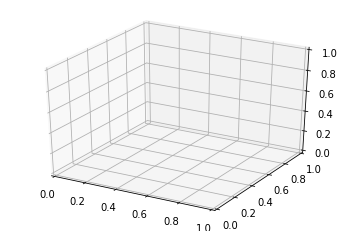

In [61]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
X = market_vol['expiry']
Y = market_vol['tenor']
X, Y = np.meshgrid(X, Y) # shape =  len(Y), len(x)
Z = np.array(market_vol['quote']).reshape(market_vol['expiry_size'], market_vol['tenor_size'])
Z = Z.transpose()
Z *= 1e4 # (bp)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(Z), np.max(Z))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%4.0d'))
ax.set_xlabel('Expiry (Year)')
ax.set_ylabel('Tenor (Year)')
ax.set_zlabel('Quote (bp)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


44.05342325622

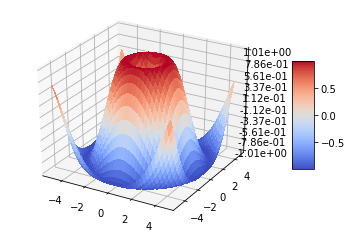

In [26]:
# 3D plot example



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%1.2e'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


<function ndarray.reshape>